# Deep Learning using MNIST

## Import data

In [2]:
import random
from matplotlib import pyplot as plt


import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

## Load data and pre-process

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
# Reshape to (n, h, w, c) and normalize to [0-1.]
x_train = x_train[:,:,:,None].astype('float32')/255.
x_test = x_test[:,:,:,None].astype('float32')/255.

In [5]:
_, h, w, c = x_train.shape
class_num = 10

print(f'x_train : {x_train.shape}')
print(f'x_test : {x_test.shape}')

x_train : (60000, 28, 28, 1)
x_test : (10000, 28, 28, 1)


## Visualize data

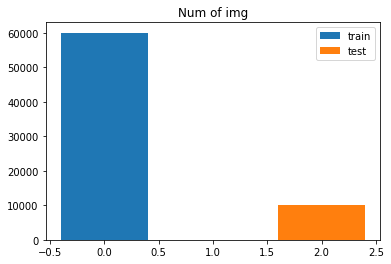

In [6]:
row = 1
col = 1

plt.figure()

plt.subplot(row, col, 1)
plt.bar(0, x_train.shape[0], label='train')
plt.bar(2, x_test.shape[0], label='test')
plt.legend()
plt.title('Num of img')

plt.show()

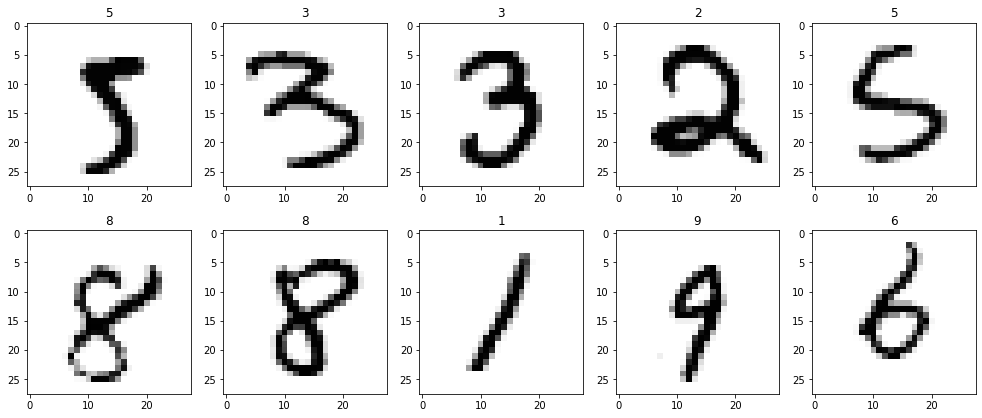

In [7]:
row = 2
col = 5

sz = 7
plt.figure(figsize=(sz*col//row, sz))
plt.tight_layout()
for i in range(1, row+1):
    for j in range(1, col+1):
        plt.subplot(row, col, col*(i-1)+j)
        r = random.randint(0, x_train.shape[0])
        plt.imshow(x_train[r][:,:,0], cmap='Greys')
        plt.title(y_train[r])
        
plt.show()

## Model

In [8]:
# Set fixed-seed
tf.random.set_seed(0)

In [9]:
model = Sequential()
model.add(Conv2D(24, kernel_size=(2,2), input_shape=(h, w, c)))
model.add(Conv2D(48, kernel_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(class_num, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 24)        120       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 48)        4656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8112)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8112)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                259616    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [11]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x=x_train, y=y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2754 - accuracy: 0.9193 - val_loss: 0.1070 - val_accuracy: 0.9683
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1447 - accuracy: 0.9571 - val_loss: 0.0884 - val_accuracy: 0.9738
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1274 - accuracy: 0.9626 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1167 - accuracy: 0.9661 - val_loss: 0.0883 - val_accuracy: 0.9759
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1107 - accuracy: 0.9681 - val_loss: 0.0747 - val_accuracy: 0.9778
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1081 - accuracy: 0.9677 - val_loss: 0.0814 - val_accuracy: 0.9779
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1028 - accuracy: 0.9699 - val_loss: 0.0961 - val_accuracy:

In [13]:
di = 'models'
if (not os.path.exists(di)):
    os.mkdir(di)

val_loss, val_accuracy = model.evaluate(x_test, y_test)
name = "{:0.4f}-{:0.4f}".format(val_loss, val_accuracy)
model.save(f'{di}/{name}.h5')
print(f'model saved at {di}/{name}.h5')

313/313 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9802
model saved at models/0.0731-0.9802.h5


## Visualize training

In [14]:
# print(history.history)
for k,v in history.history.items():
    print(k)
    print(v)
    print()

loss
[0.2754206657409668, 0.1446560174226761, 0.12741313874721527, 0.11669907718896866, 0.11072223633527756, 0.10806504637002945, 0.10280513763427734, 0.09974097460508347, 0.10079851746559143, 0.09665592759847641, 0.0962463766336441, 0.09195731580257416, 0.09082074463367462, 0.0935017392039299, 0.08944667875766754]

accuracy
[0.9192500114440918, 0.9571166634559631, 0.9625999927520752, 0.9660666584968567, 0.9680666923522949, 0.9676666855812073, 0.9699000120162964, 0.9710500240325928, 0.9694833159446716, 0.9717333316802979, 0.9721166491508484, 0.9719499945640564, 0.9734500050544739, 0.971833348274231, 0.9732666611671448]

val_loss
[0.10695473849773407, 0.08842478692531586, 0.0831172838807106, 0.08833726495504379, 0.0747440904378891, 0.08136173337697983, 0.09606768190860748, 0.10007127374410629, 0.07160316407680511, 0.07514233142137527, 0.07689490169286728, 0.08645498007535934, 0.07192513346672058, 0.06451508402824402, 0.07307135313749313]

val_accuracy
[0.9682999849319458, 0.973800003528

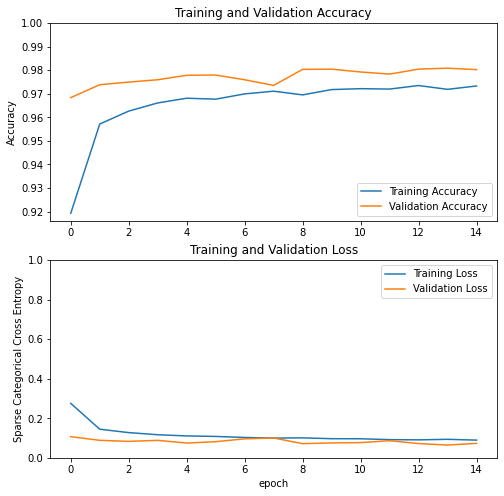

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Sparse Categorical Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Predict

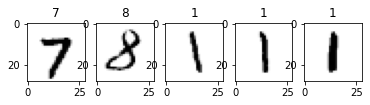

In [16]:
plt.figure()
for i in range(5):
    r = random.randint(0, x_test.shape[0])
    pred = model.predict(x_test[r][None,:,:,None])
    
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[r][:,:, 0], cmap="Greys")
    plt.title(pred.argmax())
plt.show()